<a href="https://colab.research.google.com/github/yayasane/tp_clustering/blob/main/Version_2_ProjetClassificationMalware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Projet: Detection de Malware basée sur le Machine Learning

 ## Pipeline

Pipeline Tpour l'Analyse et le Déploiement de Modèles de classification de malware basé sur le machine learning.

**1. Importation du Dataset:**


Prétraitement des Données:

**2. Séparer le dataset en features (caractéristiques) et label (étiquettes).**

**3. Définir le nombre de clusters (k):**

 Nous allons utiliser la méthode du coude pour déterminer la valeur optimale de k.

**4 . Application du clustering K-means:**

 Application du modèle K-means avec le nombre optimal de clusters.

**5. Application d'autres algorithmes de clustering:**

Application d'autres algorithmes de clustering avec le nombre optimal de clusters.












**Présentation du jeu de données :**
À partir de 137 444 exécutables, nous avons extrait huit caractéristiques pour chaque exécutable et attribué une étiquette correspondante.

**Liste des caractéristiques :**


* ajorLinkerVersion

* MajorImageVersion

* MajorOperatingSystemVersion

* SizeOfStackReserve

* NumberOfSections

* ResourceSize

* legitimate

**Definition des features:**

**AddressOfEntryPoint:** L'adresse dans le fichier exécutable où l'exécution du programme doit commencer.

**MajorLinkerVersion:**  La version majeure du programme utilisé pour lier le fichier exécutable.

**MajorImageVersion:** La version majeure de l'image du fichier exécutable.

**MajorOperatingSystemVersion:** La version majeure du système d'exploitation sous lequel le fichier exécutable est destiné à s'exécuter.

**DllCharacteristics:**  Les caractéristiques spécifiques de la DLL (Dynamic Link Library) associée au fichier exécutable.

 **SizeOfStackReserve:** La taille de la mémoire réservée pour la pile d'exécution du programme.

**NumberOfSections:** Le nombre de sections dans le fichier exécutable.

**ResourceSize:**  La taille des ressources (comme les images, les icônes, etc.) incluses dans le fichier exécutable.

**label= legitimate**

legitimite=1 <===> malware
legitimate=0 <===> benigne (non malware)



Lien du dataset:
https://drive.google.com/drive/folders/1E0RpyEh0g42jFFsNVNm9QzAorSo4QtWq?usp=drive_link

Outils: Scikit learn pour entrainer les modeles,pandas pour importer le dataset


In [9]:
! pip install kneed

K-means
* Présentation: L'algorithme K-means est un algorithme de partitionnement, ce qui signifie qu'il divise les données en un nombre prédéfini (k) de clusters.
* Principe de fonctionnement: L'algorithme commence par initialiser k centroids, qui sont des points arbitraires dans l'espace des données. Ensuite, il attribue chaque point de données au centroid le plus proche. Enfin, il recalcule la position des centroids comme étant la moyenne des points de données qui leur ont été attribués. Ce processus est répété jusqu'à ce que les centroids convergent, c'est-à-dire qu'ils ne changent plus de position.
* Du input au output:
    * Input: Un ensemble de données et un nombre de clusters k.
    * Output: Une partition des données en k clusters, ainsi que les centroids de chaque cluster.

**1. Importation du Dataset:**

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:

mondataSet = pd.read_csv("/content/drive/MyDrive/machinelearning/DatasetmalwareExtrait.csv")
print(mondataSet)
# Séparation des caractéristiques et de la cible
X = mondataSet.drop("legitimate", axis=1)
y = mondataSet["legitimate"]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

        AddressOfEntryPoint  MajorLinkerVersion  MajorImageVersion  \
0                     10407                   9                  6   
1                      5354                   9                  6   
2                     58807                   9                  6   
3                     25166                   9                  6   
4                     70387                   9                  6   
...                     ...                 ...                ...   
137439               123291                  11                  0   
137440                40000                   2                  6   
137441                59610                  10                  0   
137442                51216                   2                  0   
137443                22731                  11                  0   

        MajorOperatingSystemVersion  DllCharacteristics  SizeOfStackReserve  \
0                                 6               33088              262144   
1

**2. Séparer le dataset en features (caractéristiques) et label (étiquettes).**

In [12]:
# Séparation des caractéristiques et de la cible
X = mondataSet.drop("legitimate", axis=1)
y = mondataSet["legitimate"]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**3. Définir le nombre de clusters (k):**

Nous allons utiliser la méthode du coude pour déterminer la valeur optimale de k

In [13]:
from kneed import KneeLocator

inertias = []
range_n_clusters = range(2, 20)

for n_clusters in range_n_clusters:
    # Initialisation et ajustement du modèle K-means
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

knee = KneeLocator(range_n_clusters, inertias, curve="convex", direction="decreasing")
optimal_k = knee.knee

print("Nombre optimal de clusters (K) :", optimal_k)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Nombre optimal de clusters (K) : 8


**3. Application du clustering K-means:**

In [14]:
# Initialisation et ajustement du modèle K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_scaled)

# Obtenir les labels des clusters
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**4 . Analyse des résultats du K-means:**





*   Visualiser les clusters avec un graphique à dispersion:



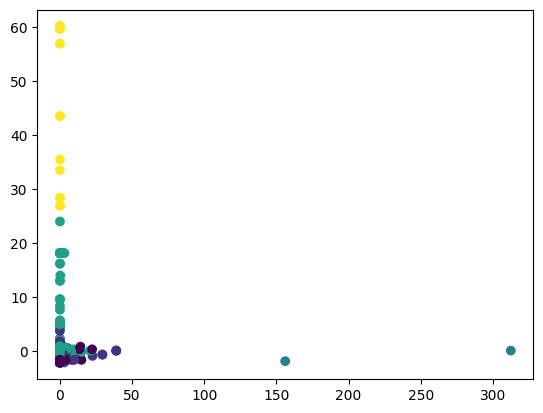

In [15]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels)
plt.show()



*   Évaluer la qualité du clustering avec le score de silhouette:





In [16]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Score de silhouette du K-means :", silhouette_avg)

Score de silhouette du K-means : 0.6003291461812519


**5. Application d'autres algorithmes de clustering:**









*   DBSCAN (Density-Based Spatial Clustering of Applications with Noise)



In [ ]:
from sklearn.cluster import DBSCAN

# Initialisation et ajustement du modèle DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Obtenir les labels des clusters
cluster_labels_dbscan = dbscan.labels_

# Évaluer la qualité du clustering avec le score de silhouette
silhouette_avg_dbscan = silhouette_score(X_scaled, cluster_labels_dbscan)
print("Score de silhouette du DBSCAN :", silhouette_avg_dbscan)




*   Clustering hiérarchique



In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Initialisation et ajustement du modèle de clustering hiérarchique
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage="ward")
hc.fit(X_scaled)

# Obtenir les labels des clusters
cluster_labels_hc = hc.labels_

# Évaluer la qualité du clustering avec le score de silhouette
silhouette_avg_hc = silhouette_score(X_scaled, cluster_labels_hc)
print("Score de silhouette du clustering hiérarchique :", silhouette_avg_hc)


Comparaisons de résultats:

In [ ]:
print("K-means: ", silhouette_avg)
print("DBSCAN: ", silhouette_avg_dbscan)
print("Clustering hiérarchique: ", silhouette_avg_hc)

Pour l'interprétation des scores :

*   Un score de silhouette proche de 1 indique une bonne séparation des clusters.
*   Un score de silhouette proche de 0 indique une mauvaise séparation des clusters.
*   Un score de silhouette négatif indique que les points sont regroupés dans des clusters mal définis.




#               **FIN**